In [1]:
from tqdm.notebook import tqdm
from datetime import datetime
from functools import partial
import matplotlib.pyplot as plt
import multiprocessing as mp
import pandas as pd
import numpy as np
import joblib
import os


from sim.incentive import assemble_W, assemble_S, compute_incentive, compute_all_incentives
from sim.subnet_data import get_wandb_history, align_dataframes_by_timestamp
from sim.plotting import plot_metric, plot_multi_validator_metric, plot_incentive, plot_incentives, plot_incentive_over_time
from sim.blocks import average_challenges_per_tempo
from sim import Simulator, run_simulations

#plt.rcParams['animation.embed_limit'] = 2**128

[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with custom encoding error
handler: 'OutStream' object has no attribute 'reconfigure'


2024-10-08 05:29:27.351 |       INFO       |  - You are connecting to finney network with endpoint wss://entrypoint-finney.opentensor.ai:443. - 
2024-10-08 05:29:27.352 |     WARNING      |  - We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network. - 
2024-10-08 05:29:27.352 |     WARNING      |  - In a future release, local subtensor will become the default endpoint. To get ahead of this change, please run a local subtensor node and point to it. - 
2024-10-08 05:29:27.446 |       INFO       |  - Connected to finney network and wss://entrypoint-finney.opentensor.ai:443. - 
2024-10-08 05:29:29.553 |       INFO       |  - You are connecting to finney network with endpoint wss://entrypoint-finney.opentensor.ai:443. - 
2024-10-08 05:29:29.553 |     WARNING      |  - We strongly encourage running a local subtensor node whenever possible. This increases decentralization and resilience of the network. - 
2024-10-08

### Load Simulation Results

Load the outputs of `run_simulations.py` 

In [2]:
name = 'lowalpha'
REWARD_FNS = ['BalancedF1Reward']
#SCORED_DFS = joblib.load(os.path.join(name, 'simulation-aligned-1728321322.4524844.pkl'))
SCORED_DFS = joblib.load(os.path.join(name, 'simulation-aligned-1728355225.5927672.pkl'))
VALIDATORS = list(SCORED_DFS.keys())
VALIDATOR_UIDS = [int(vali.split('-')[1]) for vali in VALIDATORS]

### Plot Incentives

Plot incentive at a single timestep. For each reward function that was simulated,
1. Assemble the weight matrix *W* using a single timestep from each scored & aligned validator dataframe.
2. Retrieve validator stake from the metagraph and assemble stake vector *S*
3. For each miner *j* compute incentive

$$
I_j = \frac{R_j}{\sum_k R_k}
$$
where
$$
R_k = \sum_i S_i \cdot W_{ik}
$$


In [9]:
INCENTIVES = {}

for reward_cls in REWARD_FNS:
    S = assemble_S(VALIDATOR_UIDS)
    W = assemble_W(SCORED_DFS, f'weights_{reward_cls}', idx=-1)
    I = compute_incentive(W, S)
    INCENTIVES[reward_cls] = np.sort(I[I.nonzero()])


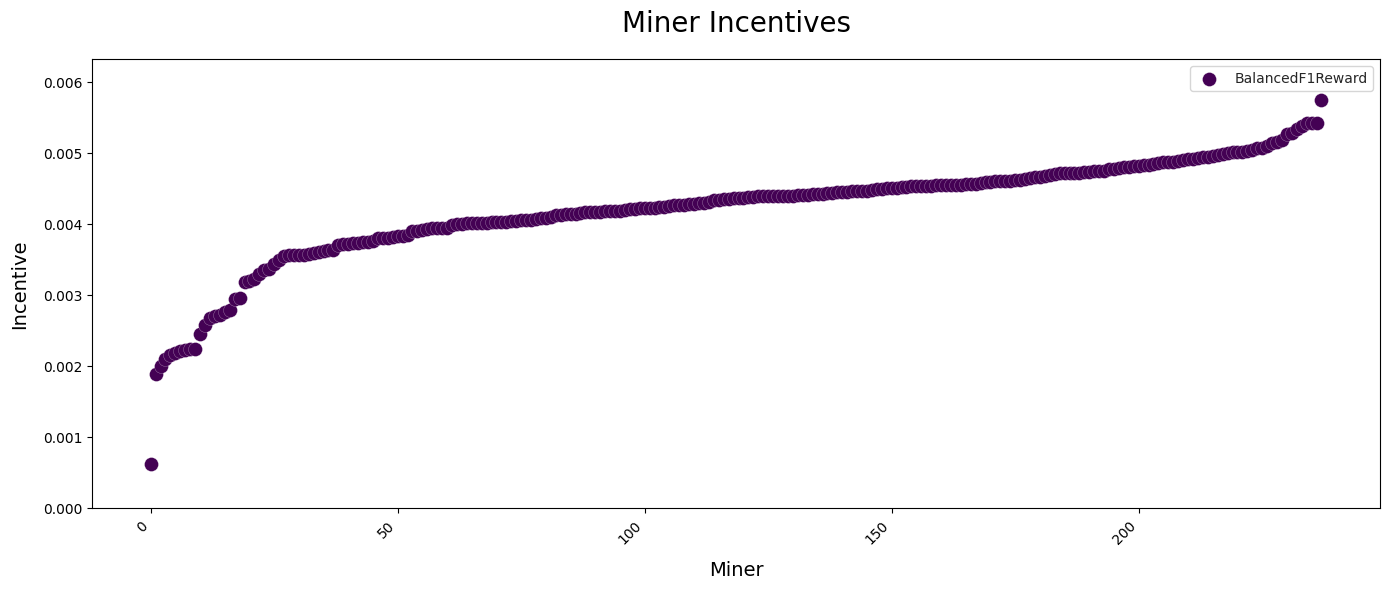

In [4]:
plot_incentives(INCENTIVES)

### Plot Incentives Over Time

Compute incentive as described in the [Plot Incentives](#Plot-Incentives) section for each timestep present in the aligned and scored validator dataframes, and display the results in an animation. Optionally highlight individual uids.

In [10]:
I = compute_all_incentives(
    SCORED_DFS, 
    'weights_BalancedF1Reward')

In [ ]:
animate_timeseries(I, highlight_uids=[0,95,100,105])